In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sb 

from datatile.summary.df import DataFrameSummary 

sns.set()

pd.options.mode.use_inf_as_na = True
# pd.set_option('')

df = pd.read_csv('data_cleaned\\Data_2-Enhanced.csv')

c:\Users\sraja\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\sraja\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\sraja\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


----

# Data Dimension Exploration

this data is essentially a fact table , 
that has 3 Key Dimensions :

- Product ( Price , Qty , Description )
- Customer 
- Location ( Country )
- Time of TRN

Since there are relatively few columns , it is feasible to do a deep dive into each and eavey columnn to understand the information it captures

then we will do bivariate analyses , between numerical columns to check for correlation 


### for this analysis , since we are looking at customer behaviour and product pricing , it is better to remove all Misc Transactions like Adjustments and Cancellations

In [2]:
df = df[ df.Invoice_Status == 'F'] [ df.Misc_Product_Code_Flag == False ] [ df.Product_Price > 0 ] [ df.Product_Qty > 0 ]

C:\Users\sraja\AppData\Local\Temp/ipykernel_30020/3124914639.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[ df.Invoice_Status == 'F'] [ df.Misc_Product_Code_Flag == False ] [ df.Product_Price > 0 ] [ df.Product_Qty > 0 ]


Time Series analysis , has been captured in the next file Data-3-Temporal_Exploration.ipynb

----

## Investigating Customer Loyalty : oreder-reorder behaviour


re-ordering can be observed at 2 levels

one is a Customer Level - where a customer revists the store , regardless of whether he buys the same items or not

the other scenario to study is when customers return to buy the same item multiple time

this involves considering a subset of data which is has no cancellations


### Case 1 : Repeat Customers 

In [3]:
temp = df [['Invoice_No','Cust_ID']].groupby('Cust_ID').nunique().sort_values('Invoice_No' , ascending=False)

# temp[ temp['Invoice_No'] > 1 ]

display(temp)
temp.describe()

,Invoice_No
Cust_ID,
14911.0,375
12748.0,322
17841.0,211
15311.0,207
13089.0,203
...,...
15979.0,1
15982.0,1
13105.0,1


,Invoice_No
count,5853.000000
mean,6.255425
std,12.762146
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,375.000000


as there is repeat traffic over the 1< year period , it is worth looking into this traffic and seeing the pattern at a month level


C:\Users\sraja\AppData\Local\Temp/ipykernel_30020/4273668711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Reorder_C [df.Reorder_C > 10 ] = 10


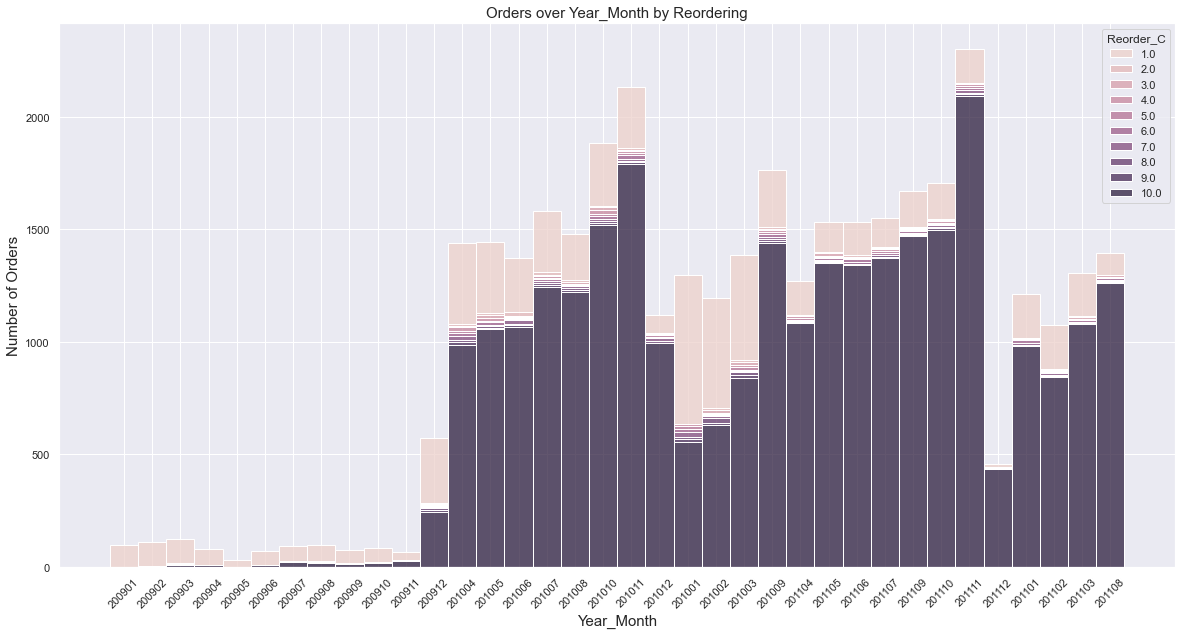

In [11]:
df['Reorder_C']=df.sort_values('Invoice_Date').dropna( subset=['Cust_ID'] , how='any').groupby(['Cust_ID'])['Year_Month'].rank(method='min')
df.Reorder_C [df.Reorder_C > 10 ] = 10


temp_df = df[['Year_Month','Reorder_C','Invoice_No']].drop_duplicates().astype({'Year_Month':'str'})

sns.set(rc = {'figure.figsize':(20,10)})
plt.set_cmap('turbo')
plt.rcParams['image.cmap']='turbo'
sns.set_palette(palette='turbo')

ax = sns.histplot(temp_df , x='Year_Month' , hue='Reorder_C'  , multiple="stack" , discrete=True)
ax.set_xlabel('Year_Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Orders over Year_Month by Reordering' ,fontsize=15)
plt.xticks(rotation=45)
plt.show()

C:\Users\sraja\AppData\Local\Temp/ipykernel_30020/3963997353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Reorder_C [df.Reorder_C > 10 ] = 10


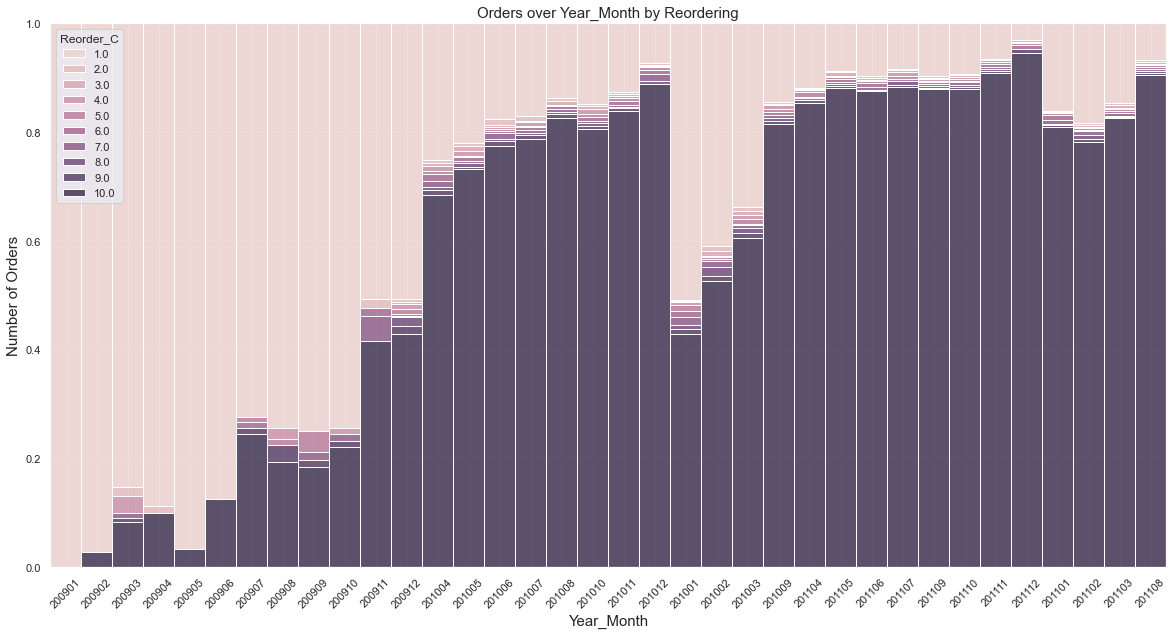

In [5]:
df['Reorder_C']=df.sort_values('Invoice_Date').dropna( subset=['Cust_ID'] , how='any').groupby(['Cust_ID'])['Year_Month'].rank(method='min')
df.Reorder_C [df.Reorder_C > 10 ] = 10


temp_df = df[['Year_Month','Reorder_C','Invoice_No']].drop_duplicates().astype({'Year_Month':'str'})

sns.set(rc = {'figure.figsize':(20,10)})
plt.set_cmap('turbo')
plt.rcParams['image.cmap']='turbo'
sns.set_palette(palette='turbo')

ax = sns.histplot(temp_df , x='Year_Month' , hue='Reorder_C'  , multiple="fill" , discrete=True)
ax.set_xlabel('Year_Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Orders over Year_Month by Reordering' ,fontsize=15)
plt.xticks(rotation=45)
plt.show()

1 represents first time buyer

while 10 represents 10 or more previous purchases

### Case 2 : Repeat Customers for the Same Product 

In [6]:
temp = df[['Invoice_No','Cust_ID','Product_Code']].groupby(['Cust_ID','Product_Code']).nunique().sort_values('Invoice_No' , ascending=False)

display(temp[ temp['Invoice_No'] > 1 ])
temp.describe()

Invoice_No
Cust_ID Product_Code            
14911.0 C2                   145
17850.0 82494L               112
        82486                109
        82482                107
        82483                106
...                          ...
13013.0 85017C                 2
13266.0 47593B                 2
13268.0 21791                  2
13549.0 84755                  2
18036.0 84520B                 2

[121345 rows x 1 columns]

,Invoice_No
count,481039.000000
mean,1.593133
std,1.788022
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,145.000000


as there is repeat traffic over the 1< year period , it is worth looking into this traffic and seeing the pattern at a month level


C:\Users\sraja\AppData\Local\Temp/ipykernel_30020/2379398363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Reorder_CP [df.Reorder_CP > 10 ] = 10


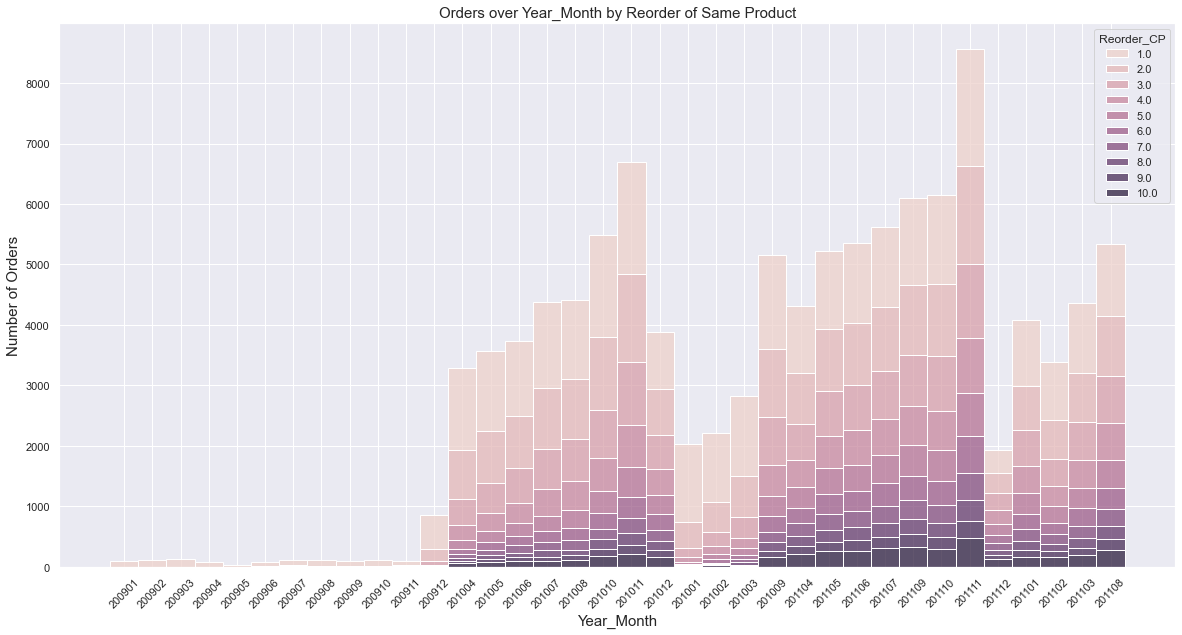

In [7]:
df['Reorder_CP']=df.sort_values('Invoice_Date').dropna( subset=['Cust_ID'] , how='any').groupby(['Cust_ID','Product_Code'])['Year_Month'].rank(method='min')
df.Reorder_CP [df.Reorder_CP > 10 ] = 10


temp_df = df[['Year_Month','Reorder_CP','Invoice_No']].drop_duplicates().astype({'Year_Month':'str'})

sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.histplot(temp_df , x='Year_Month' , hue='Reorder_CP'  , multiple="stack" , discrete=True)
ax.set_xlabel('Year_Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Orders over Year_Month by Reorder of Same Product' ,fontsize=15)
plt.xticks(rotation=45)
plt.show()

C:\Users\sraja\AppData\Local\Temp/ipykernel_30020/1576708205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Reorder_CP [df.Reorder_CP > 10 ] = 10


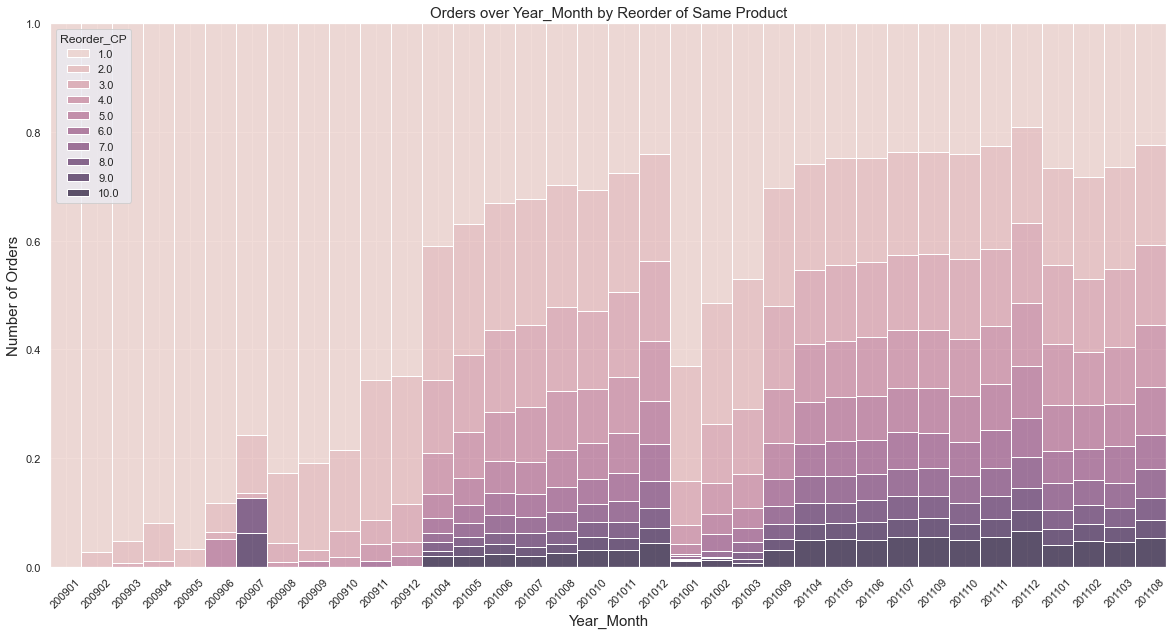

In [8]:
df['Reorder_CP']=df.sort_values('Invoice_Date').dropna( subset=['Cust_ID'] , how='any').groupby(['Cust_ID','Product_Code'])['Year_Month'].rank(method='min')
df.Reorder_CP [df.Reorder_CP > 10 ] = 10


temp_df = df[['Year_Month','Reorder_CP','Invoice_No']].drop_duplicates().astype({'Year_Month':'str'})

sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.histplot(temp_df , x='Year_Month' , hue='Reorder_CP'  , multiple="fill" , discrete=True)
ax.set_xlabel('Year_Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Orders over Year_Month by Reorder of Same Product' ,fontsize=15)
plt.xticks(rotation=45)
plt.show()

----

## Price Trend Investigation

In [9]:
temp = df[['Product_Code','Year_Month','Product_Price']]\
    .drop_duplicates().groupby(['Product_Code','Year_Month']).mean().reset_index()\
    .drop_duplicates(subset=['Product_Code','Product_Price'] , keep='first')

filter = temp['Product_Code'].value_counts() [temp['Product_Code'].value_counts() > 4 ] .index.tolist()

temp = temp [ temp['Product_Code'].isin( filter ) ] [ temp.Product_Price > 0 ]

temp

C:\Users\sraja\AppData\Local\Temp/ipykernel_30020/1062208920.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = temp [ temp['Product_Code'].isin( filter ) ] [ temp.Product_Price > 0 ]


,Product_Code,Year_Month,Product_Price
0,10002,200901,0.850000
6,10002,200910,1.700000
8,10002,200912,1.275000
9,10002,201001,1.076667
10,10002,201002,1.255000
...,...,...,...
89329,DCGS0058,200901,0.830000
89333,DCGS0058,201001,0.810000
89338,DCGS0058,201007,0.830000
89339,DCGS0058,201008,0.850000


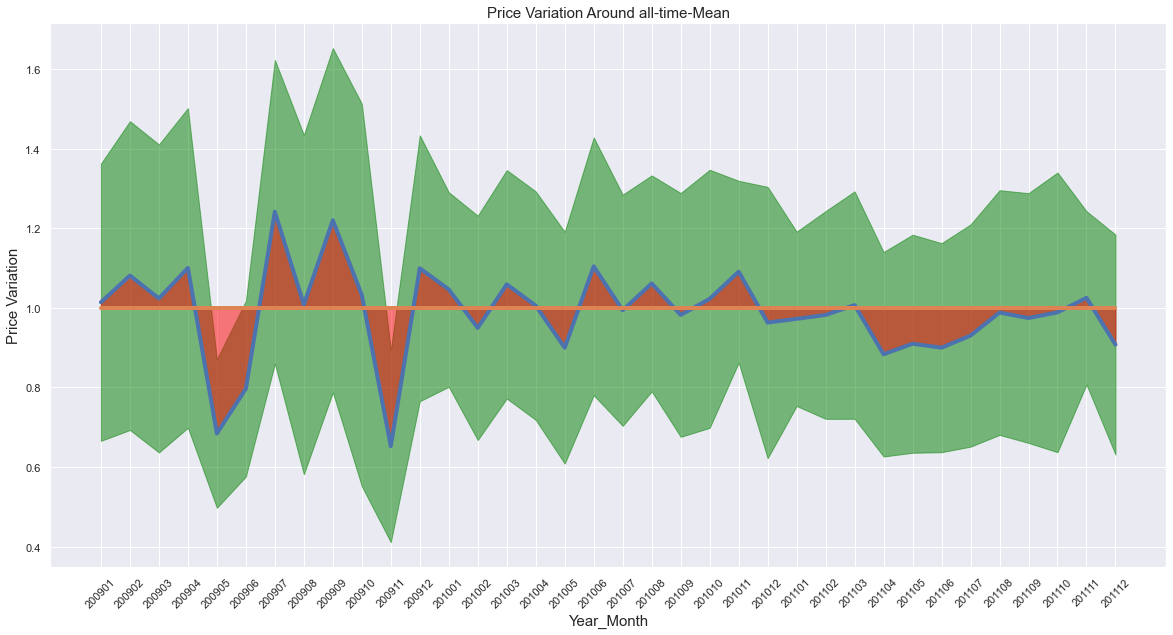

In [10]:
temp_2 = temp.astype({'Year_Month':'str'}).pivot( columns="Product_Code" , index='Year_Month' , values='Product_Price' )

temp_2 = temp_2.apply( lambda x : x / x.mean() , axis = 0)

plt.plot(   temp_2.index,
            temp_2.mean(axis=1)
            ,lw=4)

plt.plot(   temp_2.index,
            np.ones(len(temp_2.index))
            ,lw=4)

plt.fill_between(temp_2.index,
                 temp_2.mean(axis=1) + temp_2.std(axis=1), 
                 temp_2.mean(axis=1) - temp_2.std(axis=1), 
                 color='green',
                 alpha=0.5)

plt.fill_between(temp_2.index,
                 temp_2.mean(axis=1), 
                 np.ones(len(temp_2.index)), 
                 color='red',
                 alpha=0.5)

plt.xticks(rotation=45)
ax = plt.subplot()
ax.set_xlabel('Year_Month',fontsize=15)
ax.set_ylabel('Price Variation',fontsize=15)
ax.set_title('Price Variation Around all-time-Mean' ,fontsize=15)
plt.show()

-----

# Product Contribution  

Product_Code
22423     1.681525
85123A    1.310899
85099B    0.918453
23843     0.856909
47566     0.754411
84879     0.657800
22086     0.598980
23166     0.415566
79321     0.409666
22197     0.404474
Name: Sale_Value, dtype: float64

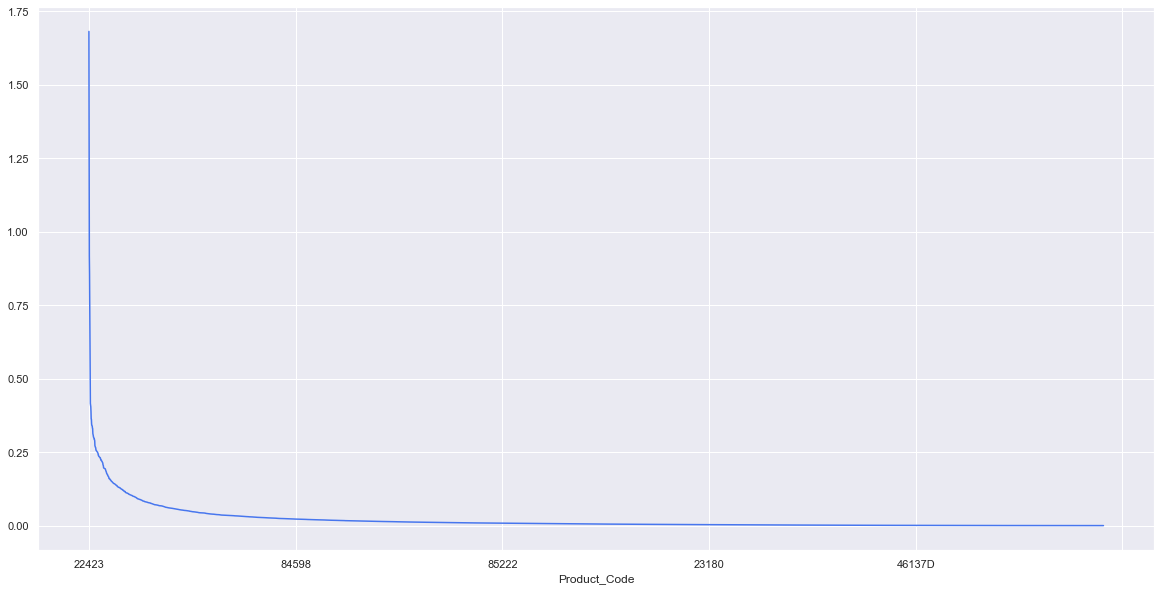

In [33]:
temp =df.groupby('Product_Code').sum()['Sale_Value'].sort_values(ascending=False) * 100 / df.Sale_Value.sum()

temp.plot()
temp.head(10)

    teh top sellin product only accounts for 1.6 % of the sales , 
    which implied that the sales are distributed over a wide product line


    but even then , the sales pattern stills folllows a sharp Pareto distribution ,
    with a minority of SKUs responsible for majority of the sales 